###SELU( Scaled Exponential Linear Unit ) :
The SELU (Scaled Exponential Linear Unit) activation function is designed to improve the performance of deep neural networks by maintaining a mean of zero and a unit variance throughout the network. It achieves this through its hyperparameters, which are tuned to ensure that the mean output of each neuron remains close to 0 and the standard deviation remains close to 1. This property helps to avoid the problems of exploding and vanishing gradients, making SELU particularly effective for self-normalizing neural networks. Consequently, even in a very deep neural network with 1,000 layers, the SELU activation function preserves the mean and standard deviation, ensuring stable and efficient training. The SELU function is defined as follows:
\
       SELU(x) = λ \begin{cases} x & \text{if } x > 0 \\
\alpha e^x - \alpha & \text{if } x \leq 0
\end{cases}


with the constants $\lambda \approx 1.0507$ and $\alpha \approx 1.67326$.





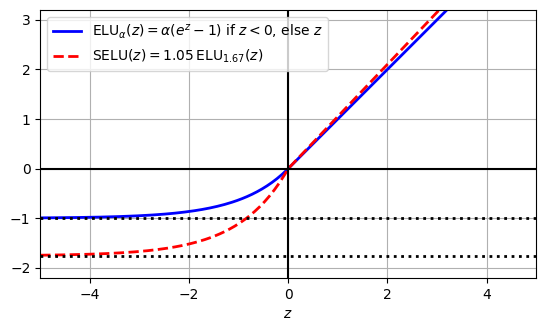

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()


Creating a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function :

In [7]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 45s 20ms/step - loss: 1.2662 - accuracy: 0.5198 - val_loss: 0.9318 - val_accuracy: 0.6474
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.7880 - accuracy: 0.7213 - val_loss: 0.6921 - val_accuracy: 0.7418
Epoch 3/5
1719/1719 [==============================] - 32s 18ms/step - loss: 0.6500 - accuracy: 0.7659 - val_loss: 0.6185 - val_accuracy: 0.7778
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.5735 - accuracy: 0.7919 - val_loss: 0.5225 - val_accuracy: 0.8164
Epoch 5/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.5201 - accuracy: 0.8173 - val_loss: 0.5417 - val_accuracy: 0.8040
